In [1]:
from pylab import np
import matplotlib.pyplot as plt

In [2]:

N = 1000 # number of steps (ball)
dt = 1.e-2 # free fall time (ball)
tf = dt*float(N) # time step [s]

g = 9.8 # grav. acceleration m/s^2
yo = 0.0 # initial position [m]
vo = 0.0 # inital velocity [m/s]
coverM = 8.7e-3 # quadratic drag coeff / objects mass [m^-1]

In [3]:
def euler(yi, ti, dt, derivs): # Euler method y_i -> y_i+1
    yiplus1 = yi + derivs(yi,ti) * dt
    return yiplus1

def freefall( y, time): # calc differentials
    diff0 = y[1] # dx/dt = v
    diff1 = - g + coverM*y[1]**2 # dv/dt = −g+(c/M)v^2
    return np.array([diff0, diff1])

In [4]:
t = np.linspace(0, tf, N) # Nx1 evenly spaced t_i time array
y = np.zeros([N,2]) # Nx2 array (N rows, 2 columns) for y_i, v_i state
y[0,0] = yo
y[0,1] = vo
print(y[0,:])

[0. 0.]


In [5]:
for j in range(N-1): # Loop over steps
    y[j+1,:] = euler(y[j], t[j], dt, freefall)

yn = y[:,0]
vn = y[:,1]


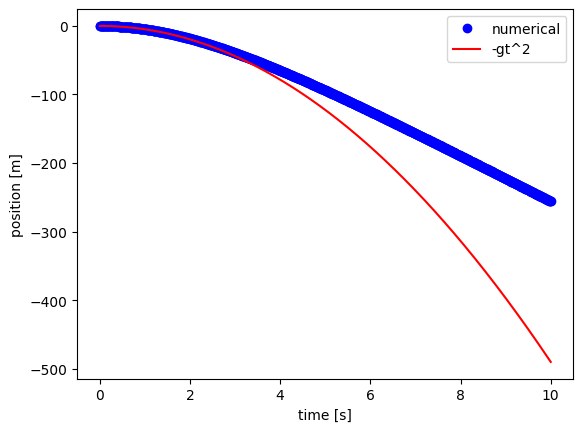

In [6]:
ya = vo*t - 0.5*g*t*t
plt.plot(t, yn, "bo",label="numerical")
plt.plot(t, ya, "r",label="-gt^2")
plt.xlabel ('time [s]')
plt.ylabel ('position [m]')
plt.legend()

Text(0, 0.5, 'velocity [m/s]')

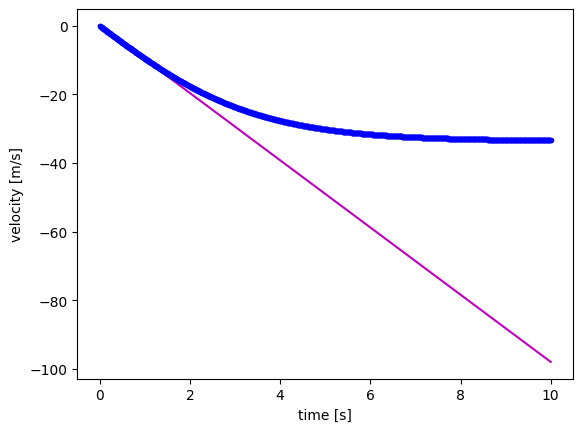

In [7]:
va = -g*t
plt.plot(t, va, "m")
plt.plot(t, vn, "b.")
plt.xlabel ('time [s]')
plt.ylabel ('velocity [m/s]')